# 2.1 Building a Bayesian model for events (*categorical variables*)

See: https://www.bayesrulesbook.com/chapter-2

In [1]:
options(digits=3);

In [2]:
# Load packages
library(bayesrules);
library(tidyverse);
library(janitor);

# Import article data
data(fake_news);

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.5.0     ✔ purrr   1.0.2
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [3]:
fake_news %>% 
  tabyl(type) %>% 
  adorn_totals("row")

,type,n,percent
,<fct>,<int>,<dbl>
1,fake,60,0.4
2,real,90,0.6
3,Total,150,1.0


In [4]:
fake_news %>% tabyl(title_has_excl, type) %>% adorn_totals("row")

,title_has_excl,fake,real
,<chr>,<dbl>,<dbl>
1,FALSE,44,88
2,TRUE,16,2
3,Total,60,90


In [5]:
# Define possible articles
article <- data.frame(type = c("real", "fake"))

# Define the prior model
prior <- c(0.6, 0.4)

In [6]:
# Simulate 3 articles
set.seed(84735)
sample_n(article, size = 3, weight = prior, replace = TRUE)

type
<chr>
fake
fake
real


In [7]:
# Simulate 10000 articles
set.seed(84735)
article_sim <- sample_n(article, size = 10000, weight = prior, replace = TRUE)

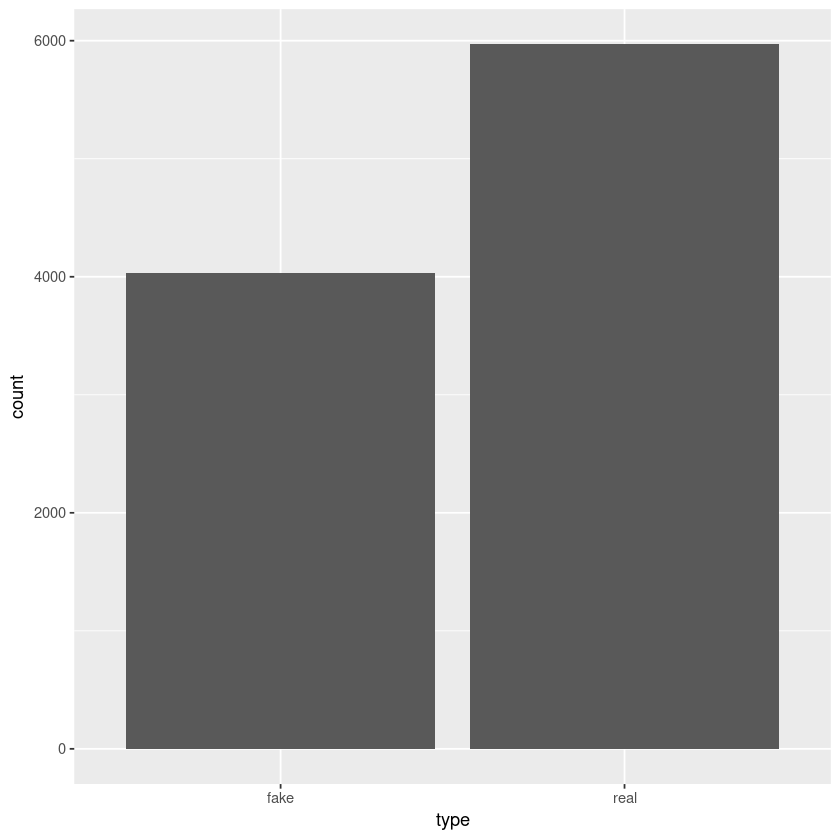

In [8]:
ggplot(article_sim, aes(x = type)) +  geom_bar()

In [9]:
article_sim %>% 
  tabyl(type) %>% 
  adorn_totals("row")

,type,n,percent
,<chr>,<int>,<dbl>
1,fake,4031,0.403
2,real,5969,0.597
3,Total,10000,1.000


In [10]:
article_sim <- article_sim %>% 
  mutate(data_model = case_when(type == "fake" ~ 0.2667,
                                type == "real" ~ 0.0222))

In [11]:
glimpse(article_sim)

Rows: 10,000
Columns: 2
$ type       <chr> "fake", "fake", "real", "fake", "fake", "real", "real", "re…
$ data_model <dbl> 0.2667, 0.2667, 0.0222, 0.2667, 0.2667, 0.0222, 0.0222, 0.0…


In [12]:
data <- c("no", "yes")

# Simulate exclamation point usage 
set.seed(3)
article_sim <- article_sim %>%
  group_by(1:n()) %>% 
  mutate(usage = sample(data, size = 1, 
                        prob = c(1 - data_model, data_model)))

In [13]:
article_sim %>% 
  tabyl(usage, type) %>% 
  adorn_totals(c("col","row"))

,usage,fake,real,Total
,<chr>,<dbl>,<dbl>,<dbl>
1,no,2961,5833,8794
2,yes,1070,136,1206
3,Total,4031,5969,10000


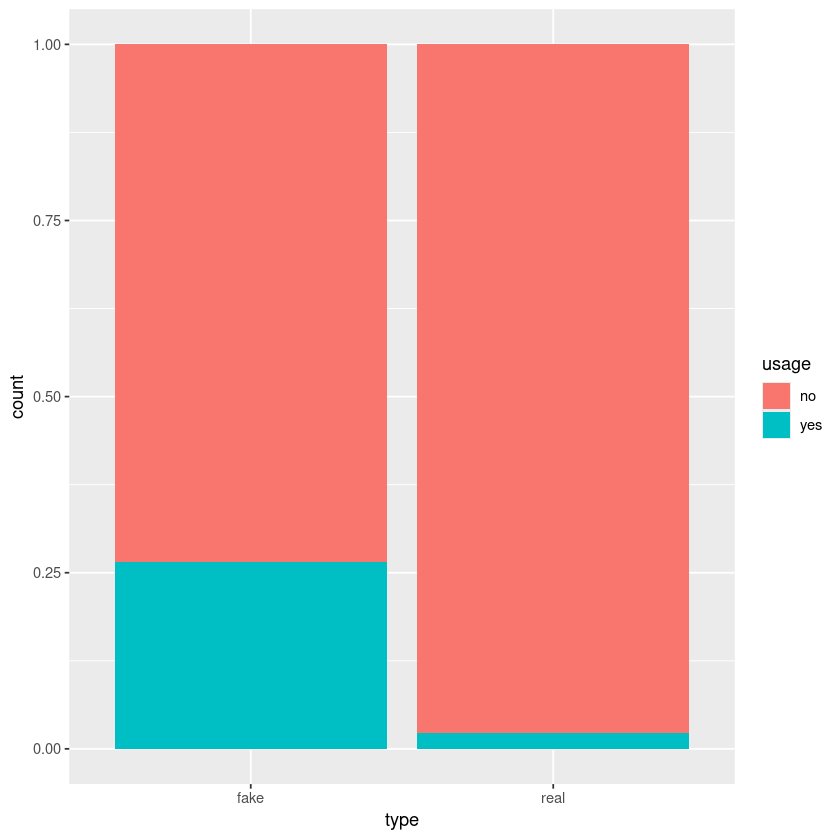

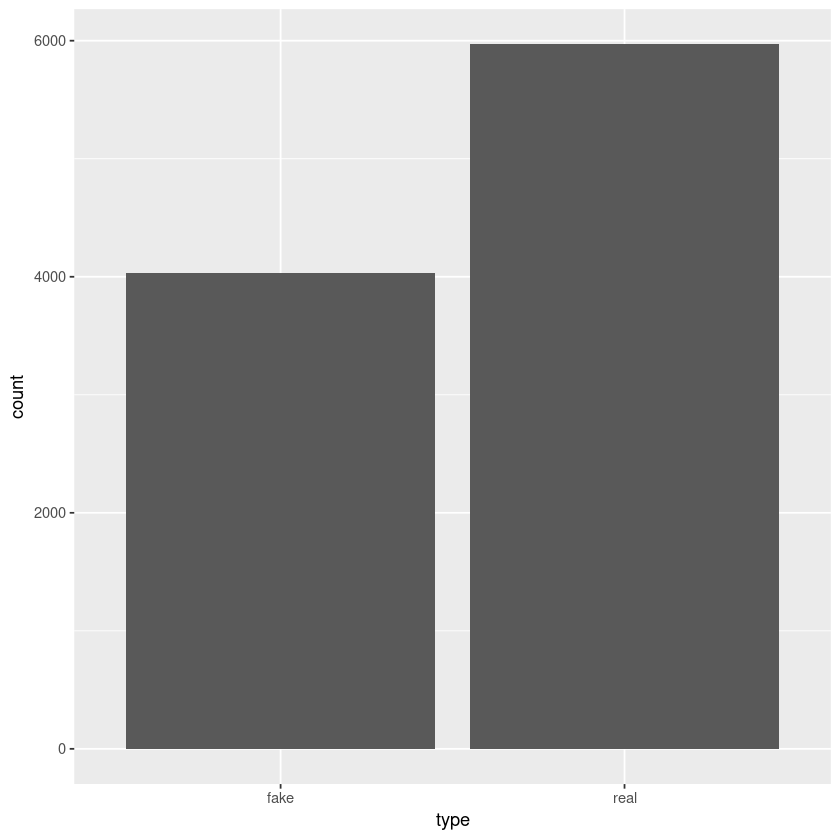

In [14]:
ggplot(article_sim, aes(x = type, fill = usage)) + 
  geom_bar(position = "fill")
ggplot(article_sim, aes(x = type)) + 
  geom_bar()

In [15]:
article_sim %>% 
  filter(usage == "yes") %>% 
  tabyl(type) %>% 
  adorn_totals("row")

,type,n,percent
,<chr>,<int>,<dbl>
1,fake,1070,0.887
2,real,136,0.113
3,Total,1206,1.000


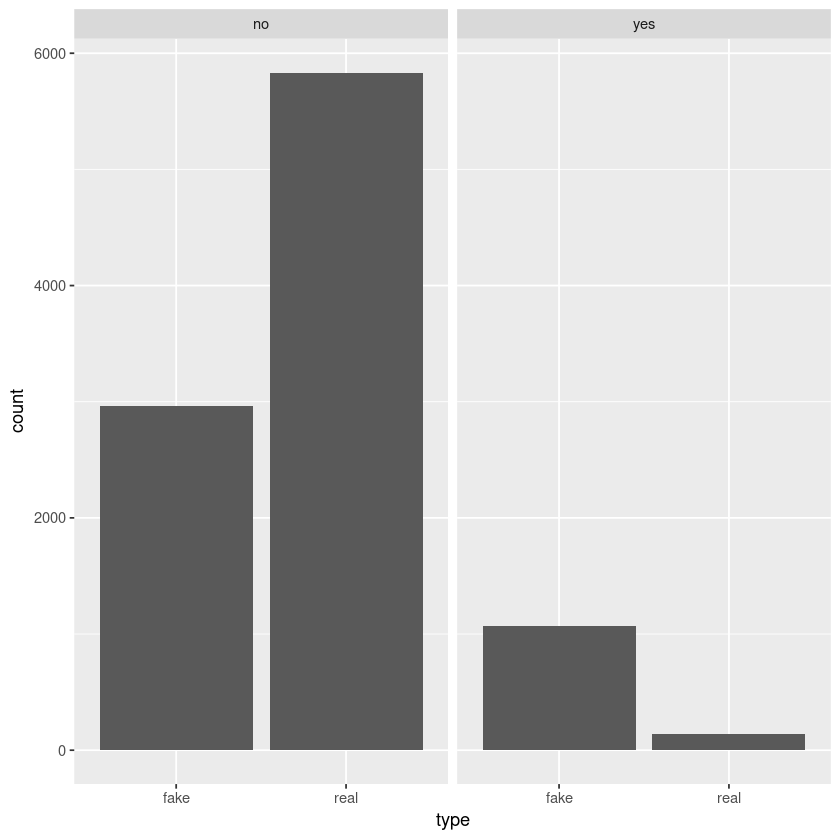

In [16]:
ggplot(article_sim, aes(x = type)) + 
  geom_bar() + 
  facet_wrap(~ usage)

# 2.2 Example: Pop vs soda vs coke

In [17]:
# Load the data
data(pop_vs_soda)

# Summarize pop use by region
pop_vs_soda %>% 
  tabyl(pop, region) %>% 
  adorn_percentages("col")

pop,midwest,northeast,south,west
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0.355,0.727,0.9208,0.706
TRUE,0.645,0.273,0.0792,0.294


In [18]:
# Prior model of U.S. region:
# region: M    N    S    W   Total
# P:     0.21 0.17 0.38 0.24 1
p_a = 0.6447042*0.21 + 0.2733974*0.17 + 0.07922231*0.38 + 0.2942785*0.24

In [19]:
# posterior chance the inteviewee livs in the South P(S|A) = P(S) * P(A|S) / P(A)
options(digits = 5); 0.38 * 0.07922231 / p_a

[1] 0.10653

# 2.3 Building a Bayesian model for random variables

In [21]:
# 2.3.7 Posterior simulation
# Define possible win probabilities
chess <- data.frame(pi = c(0.2, 0.5, 0.8))

# Define the prior model
prior <- c(0.10, 0.25, 0.65)

In [23]:
# Simulate 10000 values of pi from the prior
set.seed(84735)
chess_sim <- sample_n(chess, size = 10000, weight = prior, replace = TRUE)

In [26]:
# Simulate 10000 match outcomes
chess_sim <- chess_sim %>% mutate(y = rbinom(10000, size = 6, prob = pi))

# Check it out
chess_sim %>% head(3)

,pi,y
,<dbl>,<int>
1,0.5,4
2,0.5,3
3,0.8,4


In [27]:
# Summarize the prior
chess_sim %>% 
  tabyl(pi) %>% 
  adorn_totals("row")

,pi,n,percent
,<chr>,<int>,<dbl>
1,0.2,1017,0.1017
2,0.5,2521,0.2521
3,0.8,6462,0.6462
4,Total,10000,1.0000


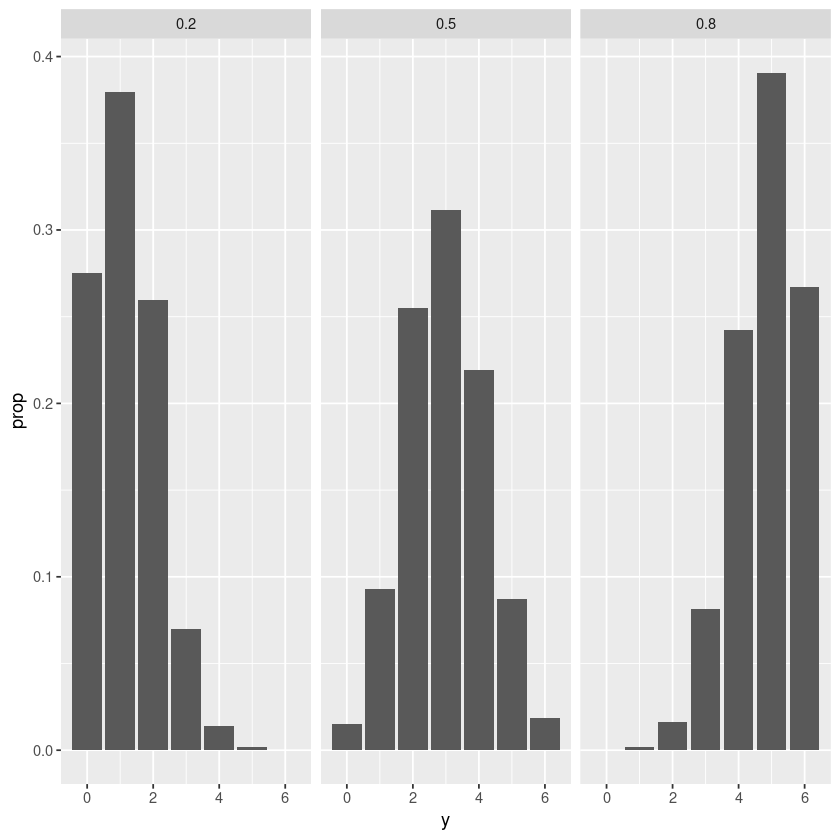

In [55]:
# Plot y by pi
ggplot(chess_sim, aes(x = y)) + 
  stat_count(aes(y = after_stat(prop))) + 
  facet_wrap(~ pi)

In [57]:
# Focus on simulations with y = 1
win_one <- chess_sim %>% 
  filter(y == 1)

# Summarize the posterior approximation
win_one %>% 
  tabyl(pi) %>% 
  adorn_totals("row")

,pi,n,percent
,<chr>,<int>,<dbl>
1,0.2,386,0.608833
2,0.5,235,0.370662
3,0.8,13,0.020505
4,Total,634,1.000000


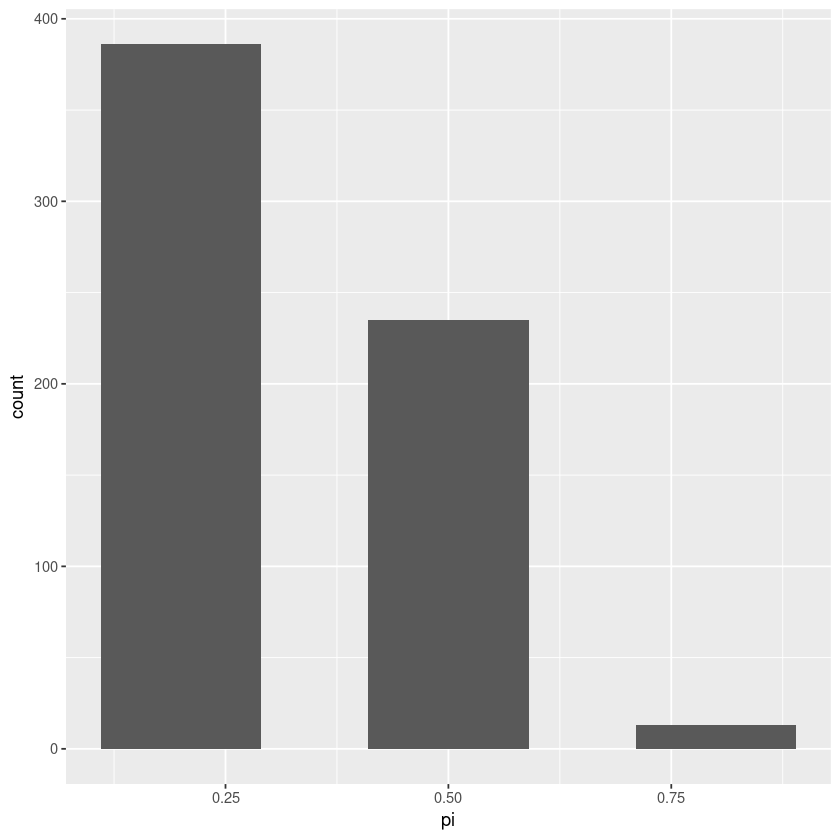

In [59]:
ggplot(win_one, aes(x = pi)) + 
  geom_bar()